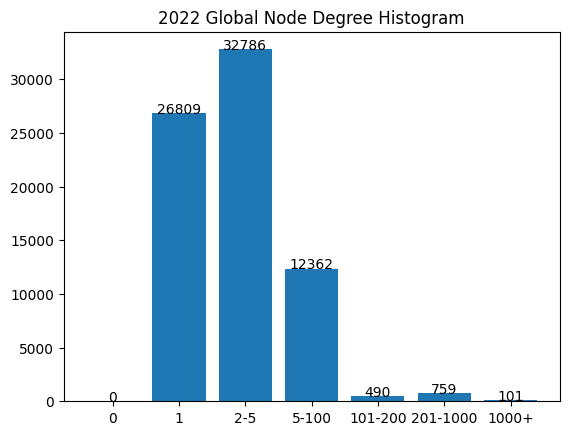

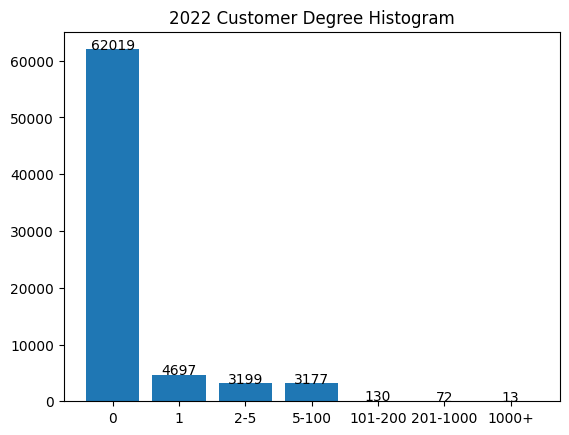

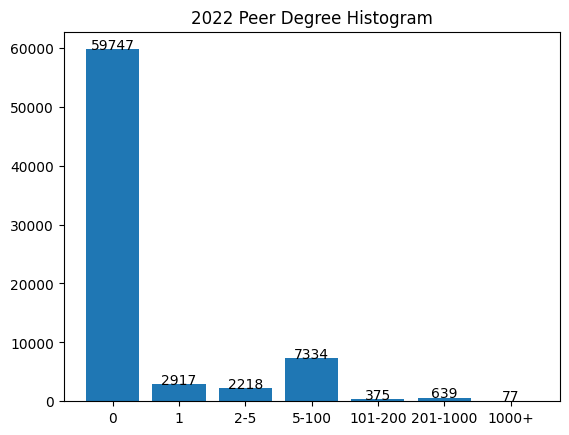

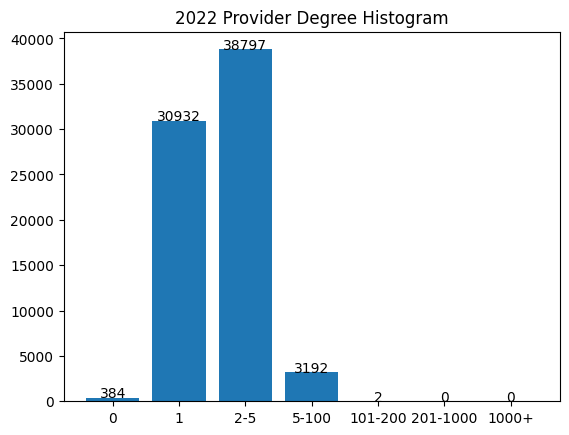

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fopen = open("20220101.as-rel2.txt", encoding="utf-8")

relationships = {}

for line in fopen:
    if line[0] != "#":
        line_split = line.split("|")
        as1 = line_split[0].strip("\n")
        as2 = line_split[1].strip("\n")
        reltype = int(line_split[2].strip("\n"))
        if as1 not in relationships:
            # [Global Node Degree, Customer Degree, Peer Degree, Provider Degree]
            relationships[as1] = [0, 0, 0, 0]
        if as2 not in relationships:
            # [Global Node Degree, Customer Degree, Peer Degree, Provider Degree]
            relationships[as2] = [0, 0, 0, 0]
        # If p2c
        if reltype == -1:
            # as1 has customer
            relationships[as1][1] += 1
            relationships[as1][0] += 1
            # as2 has provider
            relationships[as2][3] += 1
            relationships[as2][0] += 1
        # If p2p
        elif reltype == 0:
            # as1 has peer
            relationships[as1][2] += 1
            relationships[as1][0] += 1
            # as2 has
            relationships[as2][2] += 1
            relationships[as2][0] += 1
        else:
            print("Unknown reltype")
        arr1 = relationships[as1]
        arr2 = relationships[as2]
        # print(as1)
        # print(as2)
        # print(arr1)
        assert (arr1[0] == arr1[1] + arr1[2] + arr1[3])
        assert (arr2[0] == arr2[1] + arr2[2] + arr2[3])
global_degree = []
customer_degree = []
peer_degree = []
provider_degree = []
gd_bins = [0, 0, 0, 0, 0, 0, 0]
cd_bins = [0, 0, 0, 0, 0, 0, 0]
ped_bins = [0, 0, 0, 0, 0, 0, 0]
prd_bins = [0, 0, 0, 0, 0, 0, 0]
bins = [gd_bins, cd_bins, ped_bins, prd_bins]
for key in relationships:
    gd = relationships[key][0]
    cd = relationships[key][1]
    ped = relationships[key][2]
    prd = relationships[key][3]
    degree = (gd, cd, ped, prd)
    for i in range(len(bins)):
        if degree[i] == 0:
            bins[i][0] += 1
        elif degree[i] == 1:
            bins[i][1] += 1
        elif degree[i] < 5:
            bins[i][2] += 1
        elif degree[i] < 100:
            bins[i][3] += 1
        elif degree[i] < 201:
            bins[i][4] += 1
        elif degree[i] < 1001:
            bins[i][5] += 1
        else:
            bins[i][6] += 1

    global_degree.append(gd)
    customer_degree.append(cd)
    peer_degree.append(ped)
    provider_degree.append(prd)
    # print(relationships[key])
x_ticks = ["0", "1", "2-5", "5-100", "101-200", "201-1000", "1000+"]
titles = ("Global Node", "Customer", "Peer", "Provider")
title_index = 0
for bin in bins:
    plt.bar(x_ticks, bin)
    for i in range(len(x_ticks)):
        plt.text(i, bin[i], bin[i], ha="center")
    plt.title(f"2022 {titles[title_index]} Degree Histogram")
    plt.show()
    title_index += 1


In [3]:
fopen = open("routeviews-rv2-20221110-1200.pfx2as", encoding="utf-8")

ipspace = {}

for line in fopen:
    if line[0] != "#":
        line_split = line.split()
        prefix = int(line_split[1])
        as1 = line_split[2].strip("\n")
        if as1 not in ipspace:
            ipspace[as1] = 0
        ipsize = 32 - prefix
        ipspace[as1] += ipsize

# print(ipspace)

Enterprise = 54580
Content = 7439
Transit = 11288


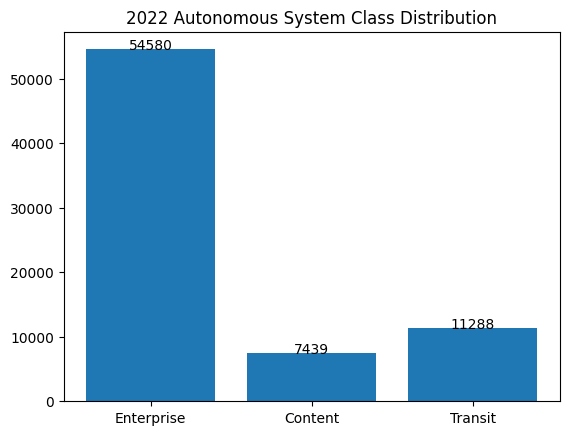

In [8]:
import matplotlib.pyplot as plt
fopen = open("20220101.as-rel2.txt", encoding="utf-8")

relationships = {}

for line in fopen:
    if line[0] != "#":
        line_split = line.split("|")
        as1 = line_split[0].strip("\n")
        as2 = line_split[1].strip("\n")
        reltype = int(line_split[2].strip("\n"))
        if as1 not in relationships:
            # [Global Node Degree, Customer Degree, Peer Degree, Provider Degree]
            relationships[as1] = [0, 0, 0, 0]
        if as2 not in relationships:
            # [Global Node Degree, Customer Degree, Peer Degree, Provider Degree]
            relationships[as2] = [0, 0, 0, 0]
        # If p2c
        if reltype == -1:
            # as1 has customer
            relationships[as1][1] += 1
            relationships[as1][0] += 1
            # as2 has provider
            relationships[as2][3] += 1
            relationships[as2][0] += 1
        # If p2p
        elif reltype == 0:
            # as1 has peer
            relationships[as1][2] += 1
            relationships[as1][0] += 1
            # as2 has
            relationships[as2][2] += 1
            relationships[as2][0] += 1
        else:
            print("Unknown reltype")
        arr1 = relationships[as1]
        arr2 = relationships[as2]
        assert (arr1[0] == arr1[1] + arr1[2] + arr1[3])
        assert (arr2[0] == arr2[1] + arr2[2] + arr2[3])
enterprise = 0
content = 0
transit = 0
for as_name in relationships:
    customers = relationships[as_name][1]
    peers = relationships[as_name][2]
    if customers == 0 and peers == 0:
        enterprise += 1
    elif customers == 0 and peers >= 1:
        content += 1
    elif customers >= 1:
        transit += 1
    else:
        print("Unknown AS type")
print(f"Enterprise = {enterprise}")
print(f"Content = {content}")
print(f"Transit = {transit}")
x_ticks = ["Enterprise", "Content", "Transit"]
y_data = [enterprise, content, transit]
plt.bar(x_ticks, y_data)
for i in range(len(x_ticks)):
    plt.text(i, y_data[i], y_data[i], ha="center")
plt.title("2022 Autonomous System Class Distribution")
plt.show()